# Web Scraping & Data Viz: IPL 2021- Point Table

## Set up

In [1]:
from bs4 import BeautifulSoup as bs
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Web Scraping

In [2]:
# Sharper way to request the permission
url = 'https://www.cricbuzz.com/cricket-series/3472/indian-premier-league-2021/points-table'
page = requests.get(url)
page.content

b'\r\n\r\n<!DOCTYPE html><html lang="en" itemscope itemtype="http://schema.org/WebPage"><head><meta charset="utf-8"><script>var is_mobile = /symbian|tizen|midp|uc(web|browser)|MSIE (5.0|6.0|7.0|8.0)|tablet/i.test(navigator.userAgent);\tif(is_mobile && window.location.hostname != "www1.cricbuzz.com") window.location.hostname = "m.cricbuzz.com";</script><style>body{background:#E3E6E3; font-family: helvetica,"Segoe UI",Arial,sans-serif;color:#222;font-size:14px; line-height: 1.5; margin:0;}\tbody, .cb-comm-pg, .cb-hm-mid {min-height:1000px}\t.container{width:980px;margin:0 auto;}\t.page{max-width: 980px;margin: 0 auto;position: relative;}\t.cb-col-8 {width:8%;}\t.cb-col-10 {width:10%;}\t.cb-col-14 {width:14%;}\t.cb-col-16 {width:16%;}\t.cb-col-20 {width:20%;}\t.cb-col-25 {width:25%;}\t.cb-col-27 {width:27%;}\t.cb-col-30 {width:30%;}\t.cb-col-33 {width:33%;}\t.cb-col-40 {width:40%;}\t.cb-col-46 {width:46%;}\t.cb-col-47 {width:47%;}\t.cb-col-50 {width:50%;}\t.cb-col-60 {width:60%;}\t.cb-col

In [3]:
soup = bs(page.content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en">
 <head>
  <meta charset="utf-8"/>
  <script>
   var is_mobile = /symbian|tizen|midp|uc(web|browser)|MSIE (5.0|6.0|7.0|8.0)|tablet/i.test(navigator.userAgent);	if(is_mobile && window.location.hostname != "www1.cricbuzz.com") window.location.hostname = "m.cricbuzz.com";
  </script>
  <style>
   body{background:#E3E6E3; font-family: helvetica,"Segoe UI",Arial,sans-serif;color:#222;font-size:14px; line-height: 1.5; margin:0;}	body, .cb-comm-pg, .cb-hm-mid {min-height:1000px}	.container{width:980px;margin:0 auto;}	.page{max-width: 980px;margin: 0 auto;position: relative;}	.cb-col-8 {width:8%;}	.cb-col-10 {width:10%;}	.cb-col-14 {width:14%;}	.cb-col-16 {width:16%;}	.cb-col-20 {width:20%;}	.cb-col-25 {width:25%;}	.cb-col-27 {width:27%;}	.cb-col-30 {width:30%;}	.cb-col-33 {width:33%;}	.cb-col-40 {width:40%;}	.cb-col-46 {width:46%;}	.cb-col-47 {width:47%;}	.cb-col-50 {width:50%;}	.cb-col-60 {width:60%;}	.cb-col-6

In [4]:
# First column's class is different from the rest of the data
# Select first column's data
first_column = soup.find_all(class_ = "cb-srs-pnts-name" )
first_column

[<td class="cb-srs-pnts-name" style="width:200px;"><a class="cb-text-link" href="/cricket-team/delhi-capitals/61"><div class="cb-col cb-col-100"><div class="cb-col cb-col-16"><img height="18" src="/a/img/v1/24x18/i1/c225644/delhi-capitals.jpg" style="padding:0px;" title="Delhi Capitals" width="24"/></div><div class="cb-col cb-col-84">Delhi Capitals<span class="cb-text-gray cb-font-10">  (Q)</span></div></div></a></td>,
 <td class="cb-srs-pnts-name" style="width:200px;"><a class="cb-text-link" href="/cricket-team/chennai-super-kings/58"><div class="cb-col cb-col-100"><div class="cb-col cb-col-16"><img height="18" src="/a/img/v1/24x18/i1/c225641/chennai-super-kings.jpg" style="padding:0px;" title="Chennai Super Kings" width="24"/></div><div class="cb-col cb-col-84">Chennai Super Kings</div></div></a></td>,
 <td class="cb-srs-pnts-name" style="width:200px;"><a class="cb-text-link" href="/cricket-team/royal-challengers-bangalore/59"><div class="cb-col cb-col-100"><div class="cb-col cb-col-

In [5]:
# Extract the texts, which are team names, from the first_column
teams_name = [i.get_text() for i in first_column]
teams_name

['Delhi Capitals\xa0\xa0(Q)',
 'Chennai Super Kings',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Punjab Kings',
 'Rajasthan Royals',
 'Sunrisers Hyderabad\xa0\xa0(E)']

In [6]:
# Select the rest of the data
other = soup.find_all(class_ = "cb-srs-pnts-td")
other

[<td class="cb-srs-pnts-td">14</td>,
 <td class="cb-srs-pnts-td">10</td>,
 <td class="cb-srs-pnts-td">4</td>,
 <td class="cb-srs-pnts-td">0</td>,
 <td class="cb-srs-pnts-td">0</td>,
 <td class="cb-srs-pnts-td text-bold">20</td>,
 <td class="cb-srs-pnts-td">+0.481</td>,
 <td class="cb-srs-pnts-td">14</td>,
 <td class="cb-srs-pnts-td">9</td>,
 <td class="cb-srs-pnts-td">5</td>,
 <td class="cb-srs-pnts-td">0</td>,
 <td class="cb-srs-pnts-td">0</td>,
 <td class="cb-srs-pnts-td text-bold">18</td>,
 <td class="cb-srs-pnts-td">+0.455</td>,
 <td class="cb-srs-pnts-td">14</td>,
 <td class="cb-srs-pnts-td">9</td>,
 <td class="cb-srs-pnts-td">5</td>,
 <td class="cb-srs-pnts-td">0</td>,
 <td class="cb-srs-pnts-td">0</td>,
 <td class="cb-srs-pnts-td text-bold">18</td>,
 <td class="cb-srs-pnts-td">-0.140</td>,
 <td class="cb-srs-pnts-td">14</td>,
 <td class="cb-srs-pnts-td">7</td>,
 <td class="cb-srs-pnts-td">7</td>,
 <td class="cb-srs-pnts-td">0</td>,
 <td class="cb-srs-pnts-td">0</td>,
 <td class=

In [7]:
other_clean = [i.get_text() for i in other]
other_clean

['14',
 '10',
 '4',
 '0',
 '0',
 '20',
 '+0.481',
 '14',
 '9',
 '5',
 '0',
 '0',
 '18',
 '+0.455',
 '14',
 '9',
 '5',
 '0',
 '0',
 '18',
 '-0.140',
 '14',
 '7',
 '7',
 '0',
 '0',
 '14',
 '+0.587',
 '14',
 '7',
 '7',
 '0',
 '0',
 '14',
 '+0.116',
 '14',
 '6',
 '8',
 '0',
 '0',
 '12',
 '-0.001',
 '14',
 '5',
 '9',
 '0',
 '0',
 '10',
 '-0.993',
 '14',
 '3',
 '11',
 '0',
 '0',
 '6',
 '-0.545']

In [8]:
# From other_clean, get the win and lose data
won = [int(other_clean[i]) for i in range(1, 51, 7)]
lose = [int(other_clean[i]) for i in range(2, 52, 7)]

# Create the dataframe with data we needed
data = [teams_name, won, lose]
df = pd.DataFrame({"Team": teams_name, "Win": won, "Lose": lose}).set_index("Team")
df

,Win,Lose
Team,,
Delhi Capitals (Q),10,4
Chennai Super Kings,9,5
Royal Challengers Bangalore,9,5
Kolkata Knight Riders,7,7
Mumbai Indians,7,7
Punjab Kings,6,8
Rajasthan Royals,5,9
Sunrisers Hyderabad (E),3,11


## Data Viz Showing Results

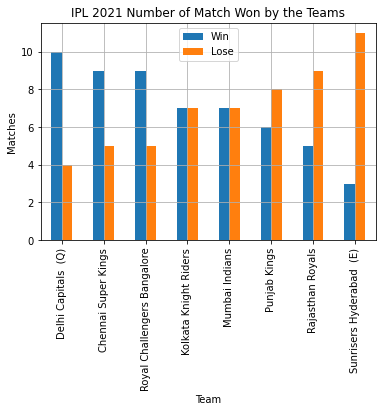

In [9]:
# Plot the win/lose matches for each team
df.plot(kind = 'bar')

plt.ylabel('Matches')
plt.xticks(rotation = 90)
plt.title('IPL 2021 Number of Match Won by the Teams')
plt.grid(True)